<a href="https://colab.research.google.com/github/Noorunnisha-glitch/kmeans--project/blob/main/kmeans_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

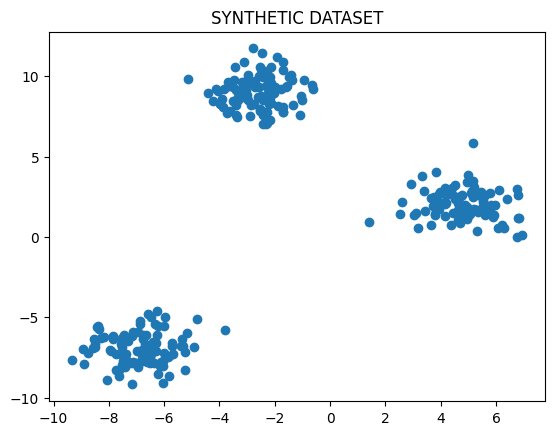

In [2]:
### To create a synthetic dataset
x, y = make_blobs(n_samples=300,centers=3,cluster_std=1.0,random_state=42)
plt.scatter(x[:, 0], x[:, 1])
plt.title("SYNTHETIC DATASET")
plt.show()

In [3]:
##to find the distance

def euclidean_dist(a, b):
    return np.linalg.norm(a - b)

In [4]:
##KMEANS ALGORITHM

def k_means(x, K, max_iters=40):
  centroids = x[np.random.choice(len(x), K, replace=False)]
  for _ in range(max_iters):
        clusters = [[] for _ in range(K)]
        for point in x:
            distances = [euclidean_dist(point, c) for c in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)
        new_centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
  return clusters, centroids
# k=4
# clusters,centroids=k_means(x,k)

# for cluster in clusters :
#     cluster = np.array(cluster)
#     plt.scatter(cluster[:, 0], cluster[:, 1])
#     plt.scatter(centroids[:, 0], centroids[:, 1],
#             s=200, marker='X')
# plt.title("K-Means Clustering (From Scratch)")
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# plt.show()

In [7]:
## USING ELBOW METHOD
def calculate_wcss(x, clusters, centroids):
    wcss = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            wcss += np.linalg.norm(point - centroids[i]) ** 2
    return wcss


In [9]:
### WCSS value fro k=2 to 10
wcss_values = []
K_range = range(2, 11)

for K in K_range:
    clusters, centroids = k_means(x, K)
    wcss = calculate_wcss(x, clusters, centroids)
    wcss_values.append(wcss)


In [10]:
wcss_values

[np.float64(5763.464789461436),
 np.float64(5694.687806572001),
 np.float64(501.2374665822756),
 np.float64(444.8914878525164),
 np.float64(445.278332145808),
 np.float64(376.9669415202913),
 np.float64(367.7152053555746),
 np.float64(306.47693800793223),
 np.float64(297.1883995577969)]

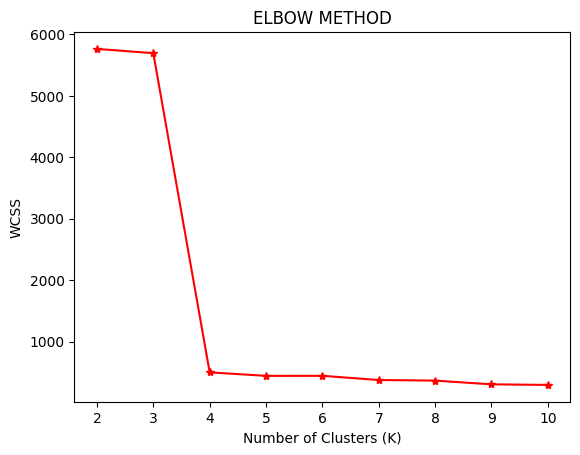

In [11]:
plt.plot(K_range, wcss_values, marker='*',c="r")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")
plt.show()

In [12]:
### USING SILHOUTTE ANALYSIS METHOD
def silhouette_score(clusters):
    silscores = []

    for i, cluster in enumerate(clusters):
        for point in cluster:

            # to find the mean distance of same cluster a[i]
            if len(cluster) > 1:
                a = np.mean([np.linalg.norm(point - other)
                for other in cluster if not np.array_equal(point, other)])
            else:
                a = 0
             # to find the mean distance of other nearest cluster b[i]
            b = np.min([np.mean([np.linalg.norm(point - other)
            for other in other_cluster])
                for j, other_cluster in enumerate(clusters)
                if j != i and len(other_cluster) > 0 ])

            s = (b - a) / max(a, b)## silhoutte score formula
            silscores.append(s)
    return np.mean(silscores)

In [13]:
### to find silhoutte score for k ranges
best_score=-1
for K in range(2, 11):
    clusters, centroids = k_means(x, K)
    score = silhouette_score(clusters)
    print(f"K = {K}, Silhouette Score = {score:.3f}")


##To print the optimal value of K
    if score > best_score:
        best_score = score
        optimal_k = K

print("\nOptimal K:", optimal_k)
print("Best Silhouette Score:", round(best_score, 3))

K = 2, Silhouette Score = 0.517
K = 3, Silhouette Score = 0.848
K = 4, Silhouette Score = 0.682
K = 5, Silhouette Score = 0.496
K = 6, Silhouette Score = 0.515
K = 7, Silhouette Score = 0.342
K = 8, Silhouette Score = 0.492
K = 9, Silhouette Score = 0.348
K = 10, Silhouette Score = 0.519

Optimal K: 3
Best Silhouette Score: 0.848


In [14]:
##TO APPLY KMEANS FOR THE OPTIMAL K VALUE
clusters, centroids = k_means(x, optimal_k)

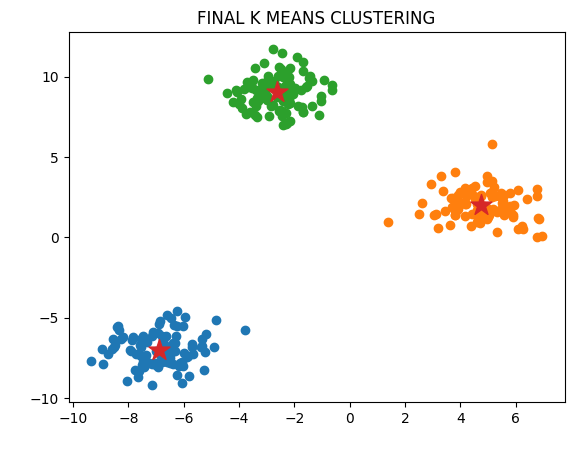

Centroid 0: [-6.88387179 -6.98398415]
Centroid 1: [4.74710337 2.01059427]
Centroid 2: [-2.63323268  9.04356978]


In [15]:
for cluster in clusters:
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1])

plt.scatter(centroids[:, 0], centroids[:, 1],s=250, marker='*')
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("FINAL K MEANS CLUSTERING")
plt.show()
for i, c in enumerate(centroids):
    print(f"Centroid {i}: {c}")